# Problem 1 
## a

In [17]:
import numpy as np

def divide_by_1p5(array):
    return array / 1.5

# Test it out
test_array = np.array([1, 2, 3, 4, 5]);
out_array = divide_by_1p5(test_array);
out_array

array([ 0.66666667,  1.33333333,  2.        ,  2.66666667,  3.33333333])

## b

In [2]:
def getOutliers(array):
    mean=np.mean(array)
    std=np.std(array)
    highCutoff=mean+std
    lowCutoff=mean-std
    greater = array > highCutoff
    less = array < lowCutoff
    greater_or_less = greater | less
    return array[greater_or_less];

# Test it out
a = np.random.normal(50, 10, 100)
print getOutliers(a)

#Sorting makes it easier to see
print np.sort(getOutliers(a))

[ 61.51523156  34.29774495  34.0578799   32.61207874  62.71282247
  33.72223056  68.52946705  38.28281958  69.05191479  34.77443601
  67.85461153  69.8988895   34.85662661  35.33228685  65.7233894
  39.22488716  66.03114243  25.86885938  39.08541758  33.93968765
  38.68192185  34.25648368  68.97604942  65.43531334  75.48367489
  63.77317526  26.59714443  63.58975866  61.10928926  62.87049535
  29.2029621   64.85035835  72.12181432  63.21149743]
[ 25.86885938  26.59714443  29.2029621   32.61207874  33.72223056
  33.93968765  34.0578799   34.25648368  34.29774495  34.77443601
  34.85662661  35.33228685  38.28281958  38.68192185  39.08541758
  39.22488716  61.10928926  61.51523156  62.71282247  62.87049535
  63.21149743  63.58975866  63.77317526  64.85035835  65.43531334
  65.7233894   66.03114243  67.85461153  68.52946705  68.97604942
  69.05191479  69.8988895   72.12181432  75.48367489]


## b - alternate solution

In [3]:
def getOutliers(array):
    mean=np.mean(array)
    std=np.std(array)
    highCutoff=mean+std
    lowCutoff=mean-std
    outliers=[]
    for i in array:
        if i > highCutoff or i < lowCutoff:
            outliers.append(i)
    return np.array(outliers)

# Test it out
a = np.random.normal(50, 10, 100);
print getOutliers(a)

#Sorting makes it easier to see
print np.sort(getOutliers(a))

[ 35.11983192  27.20596451  33.43618695  65.78806158  70.90160325
  34.52136417  30.44438589  65.98764418  32.63911872  64.04566006
  68.7567434   64.50391132  69.80599278  73.80386118  62.40120246
  64.03317278  74.47852192  34.74512504  29.77555254  78.17438506
  67.29697454  32.19635272  62.86758515  30.86886265  63.21071556
  62.7200443   36.83511228  63.63437192  30.86645141  28.81722966
  31.15688779  34.67427833]
[ 27.20596451  28.81722966  29.77555254  30.44438589  30.86645141
  30.86886265  31.15688779  32.19635272  32.63911872  33.43618695
  34.52136417  34.67427833  34.74512504  35.11983192  36.83511228
  62.40120246  62.7200443   62.86758515  63.21071556  63.63437192
  64.03317278  64.04566006  64.50391132  65.78806158  65.98764418
  67.29697454  68.7567434   69.80599278  70.90160325  73.80386118
  74.47852192  78.17438506]


## c

In [20]:
def estimate_p(measurement):
    N_SAMPLES = 1000000 
    samples = np.random.exponential(scale = 1.0, size = N_SAMPLES)
    return np.sum(samples > measurement) / float(len(samples))

print "Estimated p-value for 3 is ", estimate_p(3);
print "Estimated p-value for 5 is ", estimate_p(5);

Estimated p-value for 3 is  0.049311
Estimated p-value for 5 is  0.006718


We can also check how close we got by using the 'expon' distribution in scipy.stats

Importing this object gives us access to a variety of functions on the distribution - see the documentation [here](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.expon.html)

Using the sf (survival) function computes the integral of the distribution from X to infinity - essentially what we're trying to estimate above by taking many samples and counting the proportion of them greater than X.

In [22]:
from scipy.stats import expon

print "Actual p-value for 3 is ", expon.sf(3);
print "Actual p-value for 5 is ", expon.sf(5);

Actual p-value for 3 is  0.0497870683679
Actual p-value for 5 is  0.00673794699909


# Problem 2

## a

In [6]:
def findsubstring(string,Substring):
    length = len(Substring)
    posList=[]
    for pos,letter in enumerate(string):
        if string[pos:pos+length]==Substring:
            posList.append(pos)
    return np.array(posList)
 
x = findsubstring('ACTAGGGCTAATAGATTACGGACTATG','CT')
print x

[ 1  7 22]


## a - alternate
If you looked at a list of python string methods, you might notice the "find" method will locate a substring within a string.  However, it only finds the first match after the 'start' position.  So to search for all matches, you need to loop through, finding each match, and then updating the 'start' position so it looks for the next match next time.  Here's what a solution using this method looks like.

In [7]:
def findsubstring(string, Substring):
    posList = [];
    end_of_loop = False
    while(not end_of_loop):
        if(len(posList) == 0):
            start_position = -1;
        else:
            start_position = posList[-1];
        
        next_pos = string.find(Substring, start_position+1);
        if(next_pos > -1):
            posList.append(next_pos);
        else:
            end_of_loop = True;
        
    return np.array(posList);

x = findsubstring('ACTAGGGCTAATAGATTACGGACTATG','CT')
print x

[ 1  7 22]


## a - alternate #2
Python has a more advanced module for string searching called 're' (stands for Regular Expressions).  Regular Expression syntax is a whole language of its own, but it lets you use wildcards and other customizations to search for particular patterns.  However, we can also use it for our simple example.

In [8]:
import re
def findsubstring(string, Substring):
    return [x.start() for x in re.finditer(Substring, string)];

x = findsubstring('ACTAGGGCTAATAGATTACGGACTATG','CT')
print x

[1, 7, 22]


## b

In [9]:
difference = np.diff(x) # Just had to find the np.diff method
print difference

[ 6 15]


## c

In [11]:
## Fasta parsing function
def fastaParser(fastaFile):
    fasta_dict={}
    fh = open(fastaFile,'r')
    for line in fh:
        line = line.strip() # Remove new-line characters at the end
        if line[0]=='>':  # Find the line where a chromosome starts
            seqName = line[1::]
            fasta_dict[seqName]=""
        else:
            fasta_dict[seqName]+=line # For every other line, just append to the previous string
    return fasta_dict 
 
scer_genome = fastaParser("Yeast_Genome.fasta")

all_diffs = []
 
for chromosome in scer_genome:
    seq = scer_genome[chromosome]
    hits = findsubstring(seq, 'CT')
    diffs = np.diff(hits)
    all_diffs.extend(diffs)

print all_diffs[0:100] # Just print first 100

[3, 9, 7, 2, 24, 3, 4, 4, 16, 15, 9, 3, 2, 8, 5, 2, 4, 3, 17, 21, 3, 21, 16, 11, 5, 18, 4, 19, 5, 2, 6, 3, 2, 3, 7, 2, 24, 7, 14, 8, 2, 12, 25, 11, 12, 43, 9, 3, 12, 9, 29, 36, 15, 13, 5, 15, 5, 12, 3, 3, 5, 13, 3, 5, 6, 9, 9, 13, 20, 8, 6, 4, 8, 21, 7, 8, 4, 6, 27, 9, 2, 4, 19, 7, 13, 2, 7, 4, 19, 5, 4, 4, 5, 2, 18, 10, 2, 3, 3, 30]


## d

In [12]:
values, bins = np.histogram(all_diffs, range(0,30))
print bins
print values

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
[    0     0 47041 54878 38324 34531 36687 29194 27665 30902 24976 22859
 24669 20250 18070 19482 16007 14983 15908 13151 12226 13127 11046 10028
 10650  9034  8177  8696 14289]


<IPython.core.display.Javascript object>


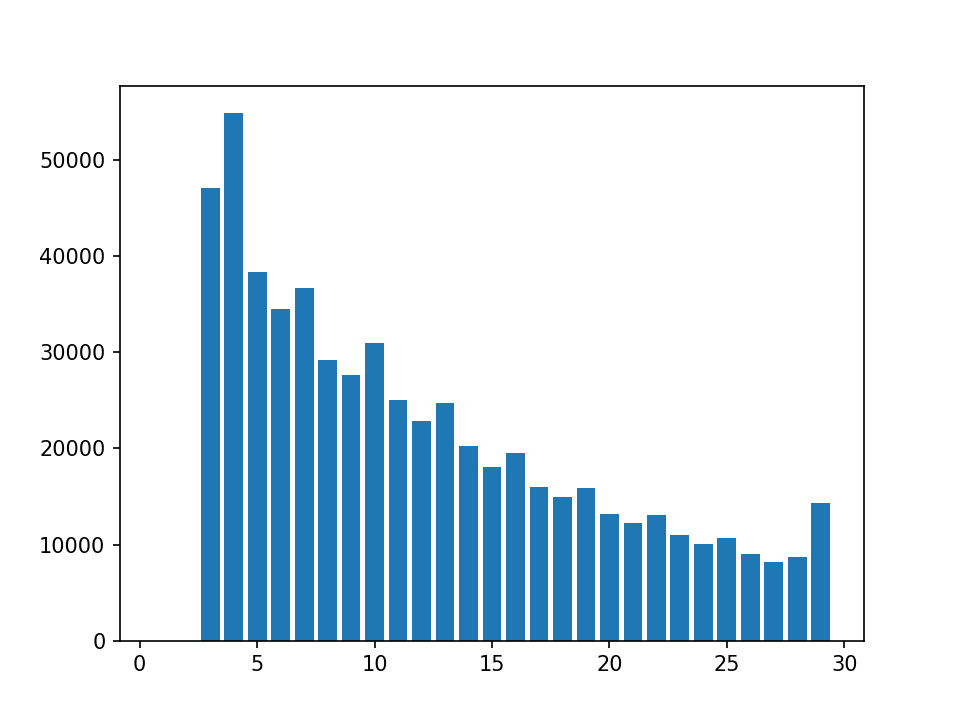

<Container object of 29 artists>

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.bar(bins[1:], values)

## Part 2
### Problem 3a

In [24]:
import pandas as pd
weather = pd.read_table("nycflights13/weather.txt")

meanPrecip = weather.precip[weather.precip > 0].mean()
stdPrecip = weather.precip[weather.precip > 0].std()

print ("On days where it rained, the mean precipitation was "
"{:.3f} with standard deviation {:.3f}".format(meanPrecip, stdPrecip))

On days where it rained, the mean precipitation was 0.048 with standard deviation 0.068


### Problem 3b

In [29]:
flights = pd.read_table("nycflights13/flights.txt")

delayAndPrecip = flights.merge(
    weather,
    left_on=['year', 'month', 'day', 'hour', 'origin'],
    right_on=['year', 'month', 'day', 'hour', 'origin']
)
delayAndPrecip = delayAndPrecip[['dep_delay', 'precip']]
delayAndPrecip.head()

,dep_delay,precip
0,-6.0,0.0
1,-3.0,0.0
2,-2.0,0.0
3,-1.0,0.0
4,0.0,0.0


### Problem 3c

In [31]:
# I also selected a low-precipitation group too, but I didn't ask you to do this in the exercises
precipCutoff = meanPrecip + stdPrecip

delay_HighPrecip = delayAndPrecip.loc[
    (delayAndPrecip['precip'] > precipCutoff)
    ]['dep_delay']

delay_LowPrecip = delayAndPrecip.loc[
    (delayAndPrecip['precip'] > 0) & 
    (delayAndPrecip['precip'] <= precipCutoff)]['dep_delay']

delay_NoPrecip = delayAndPrecip.loc[delayAndPrecip['precip'] == 0]['dep_delay']

print("High Precipiation Delay: {}".format(delay_HighPrecip.mean()))
print("Low Precipiation Delay: {}".format(delay_LowPrecip.mean()))
print("No Precipiation Delay: {}".format(delay_NoPrecip.mean()))

High Precipiation Delay: 32.5533980583
Low Precipiation Delay: 29.3532919099
No Precipiation Delay: 11.6739658738


### Problem 3d

In [32]:
from scipy.stats import ranksums
result = ranksums(delay_NoPrecip, delay_HighPrecip)
print "High vs None: p <", result.pvalue

result = ranksums(delay_NoPrecip, delay_LowPrecip)
print "Low vs None: p <", result.pvalue

result = ranksums(delay_LowPrecip, delay_HighPrecip)
print "High vs Low: p <", result.pvalue

High vs None: p < 6.88929703009e-138
Low vs None: p < 0.0
High vs Low: p < 0.912493254875
